## Importing librairies

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd
import sklearn as sk
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
from tensorflow.image import resize
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow import keras

Init Plugin
Init Graph Optimizer
Init Kernel


## Load dataset

In [2]:
# We need to resize the images, since some of them are not of the same size.

def image_resizing(image_path):
    """
    This function resizes an input image to 224 X 224
    """
    img = image.load_img(image_path, target_size=(224,224))
    return img

In [3]:
image1 = image_resizing("/Users/ivandominguez/Desktop/Spiced_Academy/spiced_projects/week_09/image/Apples/IMG-20220822-WA0037.jpg")

In [4]:
image1 = image.img_to_array(image1)

In [5]:
image1.shape

(224, 224, 3)

In [6]:
from PIL import Image
file_name = "/Users/ivandominguez/Desktop/Spiced_Academy/spiced_projects/week_09/" + "image1.jpg"

In [7]:
image = Image.open(file_name)

In [8]:
np.array(image.resize((100,100), Image.ANTIALIAS)).shape

/var/folders/6q/d0nc29t17r9cswkymm15cjkr0000gn/T/ipykernel_5338/3363259229.py:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  np.array(image.resize((100,100), Image.ANTIALIAS)).shape


(100, 100, 3)

In [9]:
import os
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image

X = []
y = []
classes = ['Apples','Kiwis', 'Pears', 'Oranges']
base_path = '/Users/ivandominguez/Desktop/Spiced_Academy/spiced_projects/week_09/train_images/'

for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
        if file.endswith('.png'):
            # load the image
            img = Image.open(base_path + target  + '/' + file)
            ## Reshape to miror a set of: (images, w,h,channels)
            img = img.resize((224,224), Image.ANTIALIAS)
            img = np.array(img)

#        creating labels
        if target == 'Apples':
             fruit = 0
        elif target == 'Kiwis':
             fruit = 1
        elif target == 'Pears':
             fruit = 2
        elif target == 'Oranges':
             fruit = 3
        X.append(img)
        y.append(fruit)
        
X = np.array(X)
y = np.array(y)

/var/folders/6q/d0nc29t17r9cswkymm15cjkr0000gn/T/ipykernel_5338/3747314774.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((224,224), Image.ANTIALIAS)


In [10]:
X.shape, y.shape

((682, 224, 224, 3), (682,))

In [11]:
X

array([[[[ 38,  46,  52],
         [ 40,  46,  53],
         [ 40,  46,  53],
         ...,
         [ 64,  73,  79],
         [ 64,  73,  79],
         [ 66,  74,  80]],

        [[ 39,  47,  53],
         [ 40,  46,  53],
         [ 40,  46,  53],
         ...,
         [ 61,  69,  75],
         [ 67,  75,  81],
         [ 67,  75,  81]],

        [[ 42,  48,  54],
         [ 42,  48,  54],
         [ 42,  48,  54],
         ...,
         [ 66,  72,  79],
         [ 67,  73,  80],
         [ 68,  74,  81]],

        ...,

        [[ 25,  26,  25],
         [ 29,  29,  31],
         [ 28,  31,  32],
         ...,
         [ 54,  51,  54],
         [ 58,  58,  60],
         [ 62,  61,  63]],

        [[ 31,  32,  31],
         [ 34,  34,  36],
         [ 28,  31,  32],
         ...,
         [ 65,  63,  66],
         [ 61,  58,  61],
         [ 61,  58,  61]],

        [[ 34,  34,  34],
         [ 31,  31,  33],
         [ 27,  30,  31],
         ...,
         [ 62,  59,  62],
        

In [12]:
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((477, 224, 224, 3), (205, 224, 224, 3), (477,), (205,))

In [14]:
xtrain.shape,ytrain.shape

((477, 224, 224, 3), (477,))

In [15]:
to_categorical(ytrain).shape

(477, 4)

In [16]:
ytrain

array([0, 2, 2, 0, 2, 3, 2, 0, 0, 0, 1, 2, 1, 3, 1, 1, 0, 1, 1, 0, 2, 1,
       0, 0, 3, 1, 3, 3, 2, 0, 2, 2, 2, 2, 0, 0, 3, 3, 0, 3, 1, 2, 1, 3,
       0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 3, 0, 2, 2, 1, 0, 3, 1,
       3, 1, 0, 1, 1, 1, 1, 3, 0, 2, 1, 3, 2, 1, 2, 0, 1, 0, 3, 3, 0, 2,
       2, 3, 0, 2, 3, 3, 0, 1, 0, 0, 2, 3, 0, 3, 2, 3, 1, 3, 0, 0, 2, 0,
       0, 3, 1, 3, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0,
       1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 3, 0, 2, 3, 3, 0, 0, 1, 3, 2, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 0, 3, 3, 0, 2, 2, 1, 3, 1, 2, 1, 2, 1, 0, 2,
       1, 0, 1, 1, 0, 0, 1, 3, 2, 1, 0, 3, 2, 0, 3, 3, 2, 2, 3, 3, 3, 0,
       2, 0, 2, 0, 1, 0, 3, 1, 2, 3, 2, 0, 3, 2, 1, 2, 2, 0, 3, 2, 0, 0,
       2, 3, 0, 0, 0, 2, 3, 0, 3, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0,
       0, 2, 2, 3, 1, 3, 1, 2, 0, 2, 2, 1, 3, 1, 3, 0, 0, 2, 2, 1, 0, 1,
       2, 0, 2, 3, 2, 2, 2, 3, 0, 2, 1, 2, 1, 0, 0, 3, 0, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0,

# CNN (Convolutional Neural Network)

In [17]:
from tensorflow.keras import backend as K
K.clear_session()
model = Sequential([
    Conv2D(filters=6,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2),strides=2),
    
    Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Flatten(),
    
    Dense(units=100,activation='relu'),
    
    Dense(units=4,activation='softmax')
])

Metal device set to: Apple M1 Pro


2022-08-26 15:28:58.461529: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-26 15:28:58.461647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               5017700   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4

In [19]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
accuracy_metrics = model.fit(xtrain,to_categorical(ytrain),batch_size=32,epochs=10,validation_split=0.3)

Epoch 1/10


2022-08-26 15:28:58.552810: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-26 15:28:58.553028: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-26 15:28:58.731123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 73ms/step - loss: 2238.8855 - accuracy: 0.3003 - val_loss: 265.1600 - val_accuracy: 0.3472
Epoch 2/10
 1/11 [=>............................] - ETA: 0s - loss: 148.8983 - accuracy: 0.5625

2022-08-26 15:28:59.509916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 53ms/step - loss: 289.8398 - accuracy: 0.3213 - val_loss: 59.9255 - val_accuracy: 0.4097
Epoch 3/10
11/11 [==============================] - 1s 53ms/step - loss: 117.9739 - accuracy: 0.3904 - val_loss: 21.4623 - val_accuracy: 0.6528
Epoch 4/10
11/11 [==============================] - 1s 52ms/step - loss: 39.5258 - accuracy: 0.6066 - val_loss: 5.8736 - val_accuracy: 0.7639
Epoch 5/10
11/11 [==============================] - 1s 51ms/step - loss: 12.7841 - accuracy: 0.7958 - val_loss: 3.5497 - val_accuracy: 0.8194
Epoch 6/10
11/11 [==============================] - 1s 51ms/step - loss: 0.4436 - accuracy: 0.9640 - val_loss: 3.9611 - val_accuracy: 0.8472
Epoch 7/10
11/11 [==============================] - 1s 51ms/step - loss: 18.3550 - accuracy: 0.7838 - val_loss: 9.7260 - val_accuracy: 0.6250
Epoch 8/10
11/11 [==============================] - 1s 51ms/step - loss: 0.9358 - accuracy: 0.9099 - val_loss: 1.4462 - val_accuracy: 0.9028
Epoch 9/10
11/1

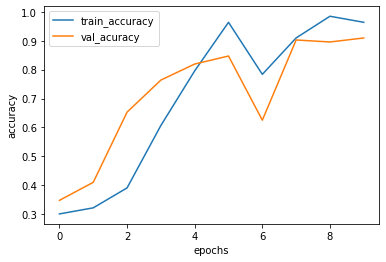

In [21]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

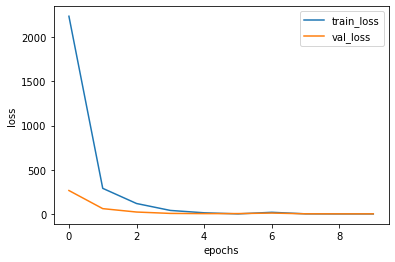

In [22]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['loss'],label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [23]:
pred = model.predict(xtest)

2022-08-26 15:29:04.929292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [24]:
pred

array([[9.90887046e-01, 3.51164071e-03, 1.85077013e-07, 5.60106523e-03],
       [9.37049448e-01, 1.34523948e-08, 1.21059169e-14, 6.29505739e-02],
       [1.00000000e+00, 1.63782057e-10, 8.21819229e-13, 9.15008624e-10],
       [9.99259651e-01, 2.17534534e-06, 1.33118408e-06, 7.36826274e-04],
       [5.03077710e-20, 1.00000000e+00, 1.98970852e-23, 0.00000000e+00],
       [9.87458587e-01, 7.09223282e-03, 5.44914138e-03, 2.48098537e-08],
       [9.41586045e-12, 1.00000000e+00, 1.88847771e-13, 2.37770093e-32],
       [9.99991179e-01, 8.33252034e-06, 4.72224343e-07, 3.44896267e-09],
       [2.71238701e-19, 1.00000000e+00, 1.06504270e-21, 0.00000000e+00],
       [4.56920417e-04, 4.13658561e-12, 2.99754947e-12, 9.99543071e-01],
       [1.68491904e-11, 9.99999166e-01, 8.89930902e-07, 6.99098947e-24],
       [5.19000564e-27, 1.01514264e-25, 1.00000000e+00, 0.00000000e+00],
       [9.59260762e-01, 3.84285860e-02, 2.66671432e-05, 2.28401111e-03],
       [9.97344553e-01, 2.62009213e-03, 3.53789437e

In [25]:
pred[8].argmax()

1

<AxesSubplot:>

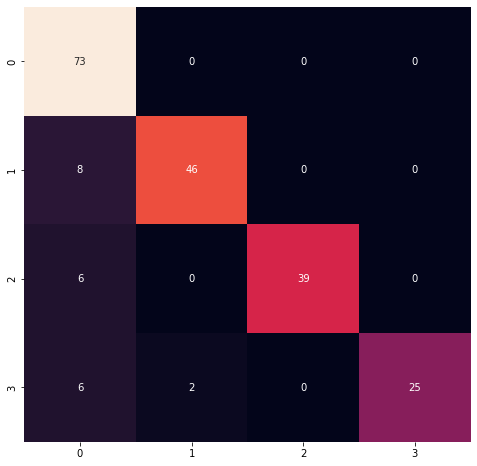

In [27]:
plt.figure(figsize = (8,8))
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true=ytest, y_pred=np.argmax(pred, axis=-1))
sns.heatmap(cm,annot=True,cbar=False)

In [28]:
model.save("base_model_cnn.h5")

In [29]:
from tensorflow.keras.models import load_model
model = load_model("base_model_cnn.h5")

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               5017700   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# you could either use this custom function or the built in function from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

In [32]:
# create a test set for images from internet

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_path = '/Users/ivandominguez/Desktop/Spiced_Academy/spiced_projects/week_09/test_images/'

test_batches = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(\
directory=test_path, target_size=(224,224), classes=['Apples','Kiwis', 'Pears', 'Oranges'], \
batch_size=64, shuffle=False)

Found 5 images belonging to 4 classes.


In [58]:
predictions = model.predict(x=train_batches, verbose=0)
cm = confusion_matrix(y_true=train_batches.classes, \
                      y_pred=np.argmax(predictions, axis=-1))

cm_plot_labels = ['Apples','Kiwis', 'Pears', 'Oranges']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

2022-08-26 15:47:33.273407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


AttributeError: 'numpy.ndarray' object has no attribute 'classes'

# Transfer learning

# MobileNet

In [35]:
train_path = '/Users/ivandominguez/Desktop/Spiced_Academy/spiced_projects/week_09/train_images'

train_datagen = ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2) # rescale scales pixel values from 0-255 to 0-1 range

train_batches = train_datagen.flow_from_directory(directory=train_path, \
target_size=(224,224), classes=['Apples','Kiwis', 'Pears', 'Oranges'], batch_size=32,subset='training')

validation_batches = train_datagen.flow_from_directory(directory=train_path, \
target_size=(224,224), classes=['Apples','Kiwis', 'Pears', 'Oranges'], batch_size=32,subset='validation')

Found 544 images belonging to 4 classes.
Found 134 images belonging to 4 classes.


In [36]:
mobile = tf.keras.applications.mobilenet.MobileNet()
model_mobilenet = Sequential()
for layer in mobile.layers[:-5]:
    model_mobilenet.add(layer)
    
for layer in model_mobilenet.layers[:-5]:
    layer.trainable = False
    
model_mobilenet.add(Dense(units=4, activation='softmax'))

In [37]:
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001),\
                        loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
hist_mobile = model_mobilenet.fit(
    train_batches,
    validation_data = validation_batches, 
    epochs = 10)

Epoch 1/10


2022-08-26 15:32:44.951376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - ETA: 0s - loss: 0.8318 - accuracy: 0.6820

2022-08-26 15:32:46.972238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 3s 135ms/step - loss: 0.8318 - accuracy: 0.6820 - val_loss: 2.1963 - val_accuracy: 0.1866
Epoch 2/10
17/17 [==============================] - 2s 114ms/step - loss: 0.1651 - accuracy: 0.9577 - val_loss: 2.0622 - val_accuracy: 0.2985
Epoch 3/10
17/17 [==============================] - 2s 113ms/step - loss: 0.0741 - accuracy: 0.9908 - val_loss: 1.4292 - val_accuracy: 0.4552
Epoch 4/10
17/17 [==============================] - 2s 113ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 1.1649 - val_accuracy: 0.4925
Epoch 5/10
17/17 [==============================] - 2s 110ms/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 0.9032 - val_accuracy: 0.5821
Epoch 6/10
17/17 [==============================] - 2s 114ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.7359 - val_accuracy: 0.7015
Epoch 7/10
17/17 [==============================] - 2s 110ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.5792 - val_accuracy: 0.7985
Epoch 8/10
17/17 

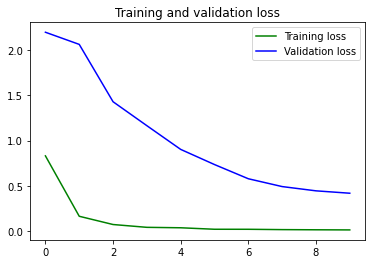

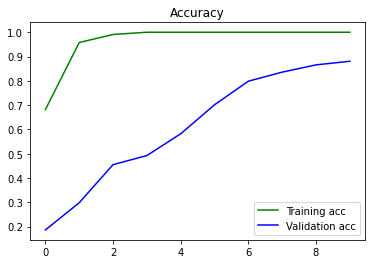

In [39]:
#Display models statistics
from matplotlib import pyplot as plt
loss = hist_mobile.history['loss']
val_loss = hist_mobile.history['val_loss']
acc = hist_mobile.history['accuracy']
val_acc = hist_mobile.history['val_accuracy']
epochsr = range(10)
plt.figure()
plt.plot(epochsr, loss, 'g', label='Training loss')
plt.plot(epochsr, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochsr, acc, 'g', label='Training acc')
plt.plot(epochsr, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.show()
mymodel_mobile = hist_mobile.model

In [40]:
model_mobilenet.save("model_mobilenet.h5")
print("Saved model to disk")

Saved model to disk


In [41]:
model_mobilenet = load_model("model_mobilenet.h5")
model_mobilenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)     

2022-08-26 15:33:05.661658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Confusion matrix, without normalization
[[14  6  9 13]
 [11  2 10  8]
 [11  5 11 10]
 [ 8  4  5  7]]


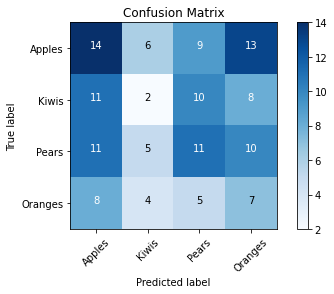

In [42]:
predictions = model_mobilenet.predict(x = validation_batches, steps = len(validation_batches), verbose = 0)
cm = confusion_matrix(y_true=validation_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['Apples','Kiwis', 'Pears', 'Oranges']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [43]:
model_mobilenet.evaluate(train_batches),model_mobilenet.evaluate(validation_batches)\
,model_mobilenet.evaluate(test_batches)

2022-08-26 15:33:06.411778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 61ms/step - loss: 0.4195 - accuracy: 0.8806


/Users/ivandominguez/miniforge3/envs/deep_learning/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 203ms/step - loss: 0.6915 - accuracy: 0.8000


([0.02413264289498329, 1.0],
 [0.41945332288742065, 0.8805969953536987],
 [0.691480278968811, 0.800000011920929])

# Fine-tuning the mobile net model and saving it as third model

In [44]:
# mobilenet_v2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

base_model = MobileNetV2(
    weights='imagenet', 
    alpha=1.0,         # specific parameter of this model, small alpha reduces the number of overall weights
    pooling='avg',      # applies global average pooling to the output of the last conv layer (like a flattening)
    include_top=False,  # we only want to have the base, not the final dense layers 
    input_shape=(224, 224, 3)
)

# freeze it!
base_model.trainable = False

**3.1.2 Add dense layers on top**

In [45]:
def model_builder(hp):
    '''
    Args:
    hp - Keras tuner object
    '''
    # Initialize the Sequential API and start stacking the layers
    model = keras.Sequential()
    model.add(base_model)
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-160
    hp_units = hp.Int('units', min_value=32, max_value=160, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    
    # Add next layers
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(len(classes), activation='softmax'))
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

    return model

# Hyperparameter Tuning

In [46]:
# Instantiate the tuner
tuner = kt.Hyperband(model_builder, # the hypermodel
                     objective='val_categorical_accuracy', # objective to optimize
                     max_epochs=50,
                     hyperband_iterations=3,
                     project_name='tuning_results')

INFO:tensorflow:Reloading Oracle from existing project ./tuning_results/oracle.json
INFO:tensorflow:Reloading Tuner from ./tuning_results/tuner0.json


In [47]:
# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 160, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [48]:
# Perform hypertuning
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tf.autograph.experimental.do_not_convert
tuner.search(xtrain, to_categorical(ytrain),
             epochs=50,
             batch_size=16,
             callbacks=[stop_early],
             validation_split=1/6)

INFO:tensorflow:Oracle triggered exit


In [49]:
# best hyperparameters
best_hp=tuner.get_best_hyperparameters(1)[0]

In [50]:
# Build the model with the optimal hyperparameters
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                81984     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
Total params: 2,340,228
Trainable params: 82,244
Non-trainable params: 2,257,984
_________________________________________________________________


In [51]:
tf.autograph.experimental.do_not_convert
h_model.fit(xtrain, to_categorical(ytrain),
            epochs=50,
            batch_size=16,
            callbacks=[stop_early],
            validation_split=1/6)

Epoch 1/50


2022-08-26 15:33:10.452511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 1.3091 - categorical_accuracy: 0.4156

2022-08-26 15:33:12.194332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 3s 75ms/step - loss: 1.3091 - categorical_accuracy: 0.4156 - val_loss: 0.9935 - val_categorical_accuracy: 0.7000
Epoch 2/50
25/25 [==============================] - 1s 45ms/step - loss: 0.9286 - categorical_accuracy: 0.6373 - val_loss: 0.8556 - val_categorical_accuracy: 0.6875
Epoch 3/50
25/25 [==============================] - 1s 43ms/step - loss: 0.7898 - categorical_accuracy: 0.6851 - val_loss: 0.7848 - val_categorical_accuracy: 0.7000
Epoch 4/50
25/25 [==============================] - 1s 44ms/step - loss: 0.6540 - categorical_accuracy: 0.7683 - val_loss: 0.6483 - val_categorical_accuracy: 0.8250
Epoch 5/50
25/25 [==============================] - 1s 43ms/step - loss: 0.5401 - categorical_accuracy: 0.8186 - val_loss: 0.5999 - val_categorical_accuracy: 0.8125
Epoch 6/50
25/25 [==============================] - 1s 43ms/step - loss: 0.4229 - categorical_accuracy: 0.8615 - val_loss: 0.5289 - val_categorical_accuracy: 0.8250
Epoch 7/50
25/25 [===

In [52]:
losses = pd.DataFrame(h_model.history.history) # losses in the training history
epoch = losses.index.values+np.ones_like(losses.index.values) # epoch number
loss = losses['loss'].values # training loss
val_loss = losses['val_loss'].values # validation loss

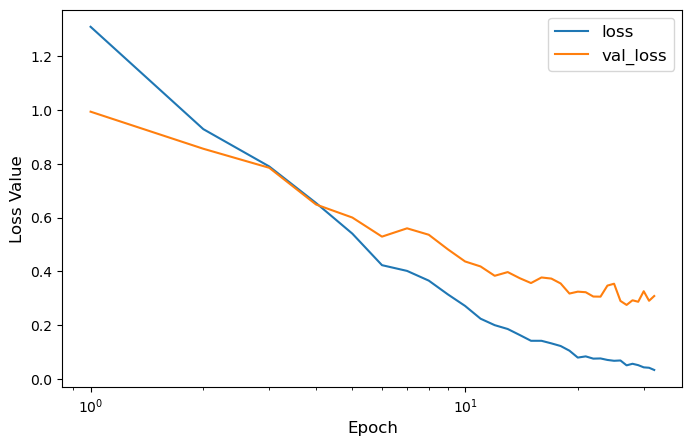

In [53]:
# plot losses against epoch number in log-scale
plt.figure(figsize=(8,5),dpi=100)
plt.semilogx(epoch, loss, linewidth=1.5, label='loss')
plt.semilogx(epoch, val_loss, linewidth=1.5, label='val_loss')
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('Loss Value',fontsize=12)
plt.legend(loc=1,fontsize=12)
None

In [54]:
h_model.save("model_tuned_mobilenet.h5")
print("Saved model to disk")

Saved model to disk


/Users/ivandominguez/miniforge3/envs/deep_learning/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [55]:
h_model = load_model("model_tuned_mobilenet.h5")
h_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                81984     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
Total params: 2,340,228
Trainable params: 82,244
Non-trainable params: 2,257,984
_________________________________________________________________


2022-08-26 15:33:48.826944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Confusion matrix, without normalization
[[  0   1   0 170]
 [  1   1   1 125]
 [  0   1   0 147]
 [  0   0   1  96]]


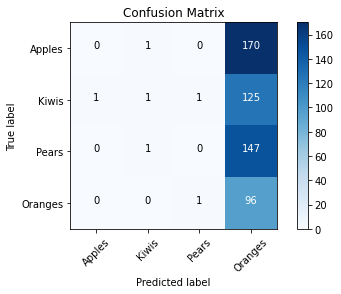

In [56]:
predictions = h_model.predict(x = train_batches, steps = len(train_batches), verbose = 0)
cm = confusion_matrix(y_true=train_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['Apples','Kiwis', 'Pears', 'Oranges']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')